In [1]:
from sklearn.cluster import KMeans

from sklearn.cluster import HDBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gal_csv=pd.read_csv('/home/kevin/aufklarung_astro_station/project2/sqlgalaxy_table.csv')
gal_csv.columns

Index(['specObjID', 'z', 'class', 'subClass', 'ra', 'dec', 'mjd', 'petroMag_u',
       'petroMag_g', 'petroMag_r', 'petroMag_i', 'petroMag_z', 'petroRad_u',
       'petroRad_g', 'petroRad_r', 'petroRad_i', 'petroRad_z', 'q_u', 'q_g',
       'q_r', 'q_i', 'q_z', 'u_u', 'u_g', 'u_r', 'u_i', 'u_z', 'deVRad_u',
       'deVRad_g', 'deVRad_r', 'deVRad_i', 'deVRad_z', 'deVAB_u', 'deVAB_g',
       'deVAB_r', 'deVAB_i', 'deVAB_z', 'extinction_u', 'extinction_g',
       'extinction_r', 'extinction_i', 'extinction_z', 'u', 'g', 'r', 'i',
       'bptclass', 'oh_p2p5', 'oh_p16', 'oh_p50', 'oh_p84', 'oh_p97p5',
       'lgm_tot_p2p5', 'lgm_tot_p16', 'lgm_tot_p50', 'lgm_tot_p84',
       'lgm_tot_p97p5', 'sfr_tot_p2p5', 'sfr_tot_p16', 'sfr_tot_p50',
       'sfr_tot_p84', 'sfr_tot_p97p5', 'sigma_balmer', 'oii_3726_reqw',
       'oii_3726_flux', 'neiii_3869_reqw', 'neiii_3869_flux', 'h_delta_reqw',
       'h_delta_flux', 'h_gamma_reqw', 'h_gamma_flux', 'oiii_4363_reqw',
       'oiii_4363_flux', 'h_beta_r

In [3]:
# Cleaning of data to remove outliers
exclude_columns=["specObjID", "class", "subClass", "ra", "dec", "mjd"]
gal_csv_exc=gal_csv.drop(columns=exclude_columns)


gal_csv_exc= gal_csv_exc[ (gal_csv_exc
						 <= 
						 10*gal_csv_exc.median())
						  &
						  (gal_csv_exc 
						 >= 
						 -10*gal_csv_exc.median())  ]

gal_csv_exc.fillna(0,inplace=True)


In [4]:
#Collecting the columns together

clustering_data = gal_csv_exc[["sfr_tot_p50", "lgm_tot_p50", "oh_p50"]]

# Subtract "r" column from "i" column to calculate data color
gal_csv_exc['data_color'] = gal_csv_exc['i'] - gal_csv_exc['r']

# Create a new DataFrame with selected columns and the subtracted column
clustering_data_with_color = clustering_data.copy()
clustering_data_with_color['data_color'] = gal_csv_exc['data_color']


1867
1244
1333
6
550


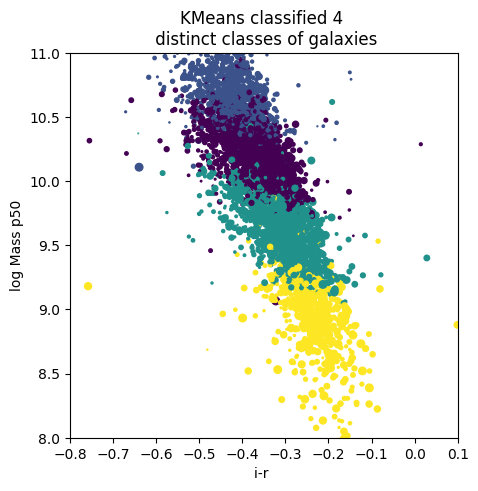

In [10]:
#Applying KMEANs clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(clustering_data_with_color)


#Visualisation
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc["i"]-gal_csv_exc["r"], 
			gal_csv_exc["lgm_tot_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=labels)
plt.xlim([-0.8,0.1])
plt.ylim([8,11])
plt.title(f"KMeans classified {len(np.unique(labels))-1} \n distinct classes of galaxies")
plt.xlabel('i-r ')
plt.ylabel('log Mass p50')



# Attach the classified labels and then save the new updated csv file
gal_csv["labels"]=labels
gal_csv.to_csv("sqlgalaxy_table_kmeans_classified.csv", index=False)

#number of galaxies in the given classes
for i in np.unique(labels):
    print(len(labels[labels==i]))

4145
157
383
197


Text(0, 0.5, 'log Mass p50')

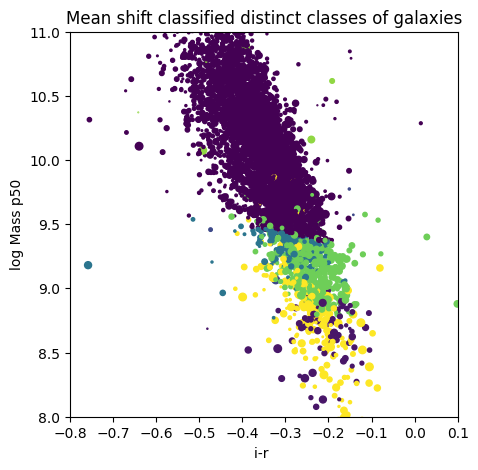

In [12]:
#Mean Shift clustering

bandwidth = estimate_bandwidth(clustering_data_with_color, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(clustering_data_with_color)
labels = ms.labels_
gal_csv_exc["labels"]=labels



#number of galaxies in the given classes
for i in np.unique(labels):
    if len(labels[labels==i])>100:
        
        print(len(labels[labels==i]))


#Visualisation
gal_csv_exc_labels=gal_csv_exc
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc_labels["i"]-gal_csv_exc_labels["r"], 
			gal_csv_exc_labels["lgm_tot_p50"],
			s=1*gal_csv_exc_labels["deVRad_i"], 
			c=gal_csv_exc_labels["labels"])
plt.xlim([-0.8,0.1])
plt.ylim([8,11])
plt.title(f"Mean shift classified distinct classes of galaxies")
plt.xlabel('i-r ')
plt.ylabel('log Mass p50')
